## Linear Regression Model to predict the percentage of a student based on the no. of study hours

## GRIP @ Sparks Foundation

### Internship Task1: Prediction Using Supervised ML

#### Author: Khizer Ahmed Biyabani

In this section we are going to use a simple linear regression model to predict the precentage of a student based on the number of study hours.

### Linear Regression Model: 
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

#### Model:

In my example I have used a LinearRegression model from sklearn module of python.

In [2]:
#import the necessary libraries.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
%matplotlib inline

In [3]:
#importing the data from the given url.
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)

print("The data imported:")
data.head(10)

The data imported:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting the data:

At first, we need to plot our given data into a 2-D graph. 

Text(0, 0.5, 'Percentage')

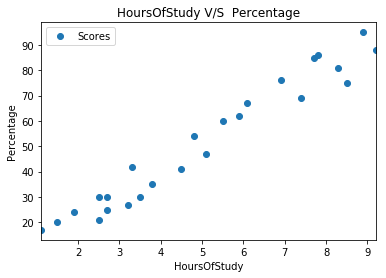

In [4]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('HoursOfStudy V/S  Percentage')
plt.xlabel("HoursOfStudy")
plt.ylabel("Percentage")

#### From the above graph, we can infer that there is a positive relationship between the hours of study and percentage obtained of the students. 

### Preparing the data:
Before running our regression model we need to separate the given dataset into testing and training sets. Also, as it is the linear regression problem we need two variables, dependent and an independent variable.

In [5]:
#Lets first find the number of rows and columns in our dataset.
data.shape

(25, 2)

#### Splitting the dataset into dependent variable(y=Percentage) and independent variable(X=Hours of Study). 

In [6]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values


#### Creating a Training and Testing set for our LinearRegression Model.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training our Model:

In [8]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("The Model is Trained.")

The Model is Trained.


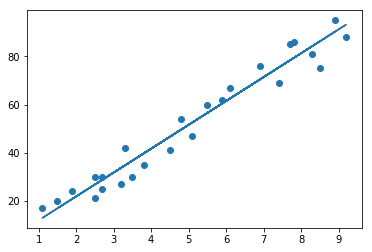

In [9]:
#Lets plot th Best-Fit Line or Regression line.
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making predictions:
Now, that we have trained the model. Let us make some predictions on the testing data set.

In [10]:
print(X_test) #Testing Set - Hours Of Study.

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
y_pred=regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [12]:
#Comparing the Actual and Predicted Values.
datafra = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
datafra

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#To find the predicted score if a student studies for 9.25hrs/day.
hrs=[[9.25]]
score = regressor.predict(hrs)
score.reshape(1,-1)
print("Hours Of Study=",hrs)
print("Predicted Score=",score[0])

Hours Of Study= [[9.25]]
Predicted Score= 93.69173248737539


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
